<a href="https://colab.research.google.com/github/Ampuia/Learning-Machine-Learning/blob/main/ClothsRecognitionAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

import numpy as np

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [6]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from __future__ import absolute_import, division, print_function

import tensorflow_datasets as tfds

import math
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print (tf.__version__)


2.9.2


In [8]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [9]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [10]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of examples {}".format(num_train_examples))
print("Number of tests {}".format(num_test_examples))

Number of examples 60000
Number of tests 10000


In [11]:
def normalize(images, labels):
   images = tf.cast(images, tf.float32)
   images /= 255
   return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

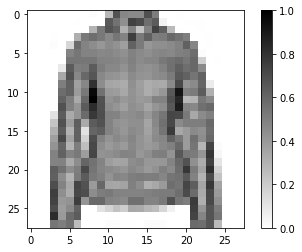

In [12]:
for image, label in test_dataset.take(1):
  break
 
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

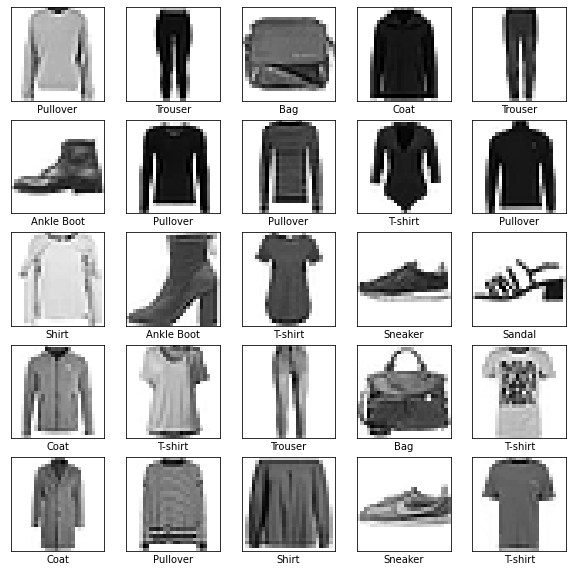

In [13]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in train_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [17]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4927 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3728 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3341 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2917 - accuracy: 0.8934


In [18]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ' , test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3338 - accuracy: 0.8809
Accuracy on test dataset:  0.8809000253677368


In [21]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 24ms/step


In [22]:
predictions.shape

(32, 10)

In [34]:
predictions[26]

array([1.9429035e-05, 2.9908909e-07, 3.2299529e-06, 1.8598099e-06,
       3.1712975e-06, 1.8308148e-02, 3.2743503e-06, 9.7840655e-01,
       1.1551600e-04, 3.1384607e-03], dtype=float32)

In [35]:
np.argmax(predictions[26])

7

In [36]:
test_labels[26]

7

In [37]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

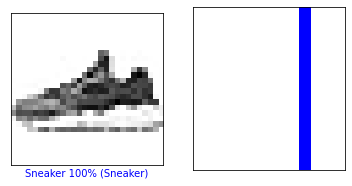

In [51]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

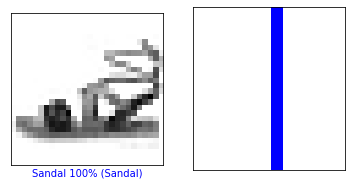

In [50]:
i = 31
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

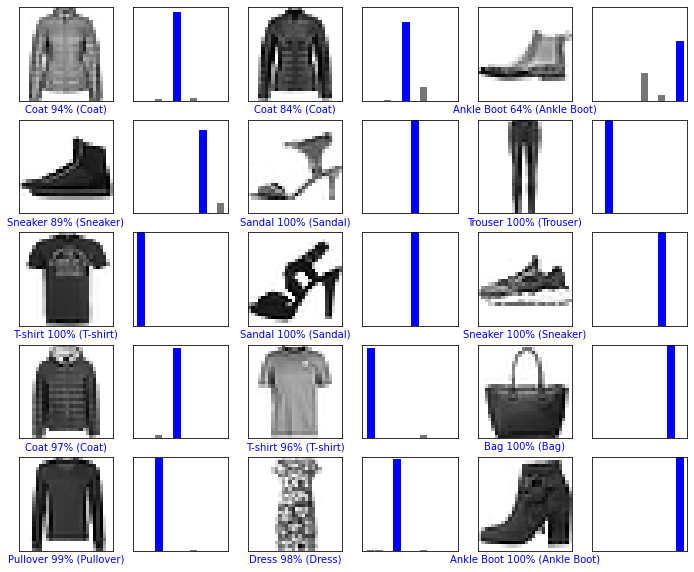

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [53]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [54]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [55]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 87ms/step
[[7.6472588e-06 9.8047603e-06 2.1152172e-02 1.9870192e-06 9.4481182e-01
  5.5786269e-09 3.3976752e-02 5.6081710e-08 3.9746639e-05 1.2382250e-08]]


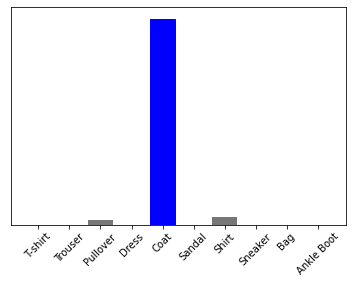

In [56]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
np.argmax(predictions_single[0])

4

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()